In [1]:
using Gadfly

In [2]:
function down(n,r)
    return prod([n-r+1:n])
end

down (generic function with 1 method)

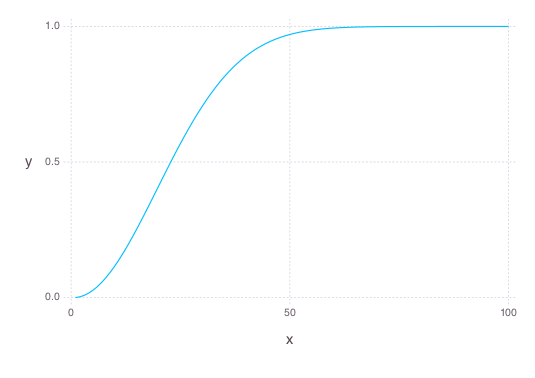

In [3]:
n = 365
vals = Float64[down(big(n),r)/big(n)^r for r=1:100]
plot(x=[1:100],y=1-vals,Geom.line)

In [4]:
function Stirling(n)
    return n^n*exp(-n)*sqrt(2Ï€*n) 
end

Stirling (generic function with 1 method)

In [5]:
# Comparing values of factorials to Stirling's approximations 
hcat([Stirling(n) for n=1:10],[factorial(n) for n=1:10])

10x2 Array{Float64,2}:
      0.922137       1.0     
      1.919          2.0     
      5.83621        6.0     
     23.5062        24.0     
    118.019        120.0     
    710.078        720.0     
   4980.4         5040.0     
  39902.4        40320.0     
 359537.0       362880.0     
      3.5987e6       3.6288e6

In [6]:
function randompermutation(n::Integer)
    numbers = [1:n]
    result = Int64[]
    for i=1:n
        push!(result,numbers[rand(1:length(numbers))])
        numbers = filter( x-> x != result[end], numbers)
    end
    return result
end

randompermutation (generic function with 1 method)

In [7]:
randompermutation(10)

10-element Array{Int64,1}:
  9
  8
  1
  6
  5
  2
  4
  7
 10
  3

In [8]:
# count the number of fixed points, i.e., numbers k which are 
# in position k
mean([sum(randompermutation(10) .== [1:10]) == 0 for _=1:10_000])

0.3782

In [9]:
1/e

0.36787944117144233

In [10]:
# counts the number of records in a permutation, i.e., numbers which 
# are bigger than all the preceding ones 
function records(permutation)
    r = 0
    result = 0
    for i=1:length(permutation)
        if permutation[i] > r
            result += 1
            r = permutation[i]
        end
    end
    return result
end

records (generic function with 1 method)

In [11]:
mean([records(randompermutation(200)) for _=1:1000])

5.868

In [12]:
function BinomialProbabilities(n,p)
    return Float64[binomial(big(n),r)*p^r*(1-p)^(n-r) for r=0:n] 
end

function PowerCurve(n,p,m)
    # Returns the probability of getting m or more successes in n Bernoulli
    # trials of probability p
    return sum(BinomialProbabilities(n,p)[m+1:end])
end

PowerCurve (generic function with 1 method)

In [13]:
PowerCurve(1000,0.5,600)

1.3642320780330092e-10

In [14]:
PowerCurve(10,0.5,6)

0.376953125